In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#load dataset
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#join two dataset on the 'id' column
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
dtype: int64

In [6]:
#drop duplicated columns
columns_to_drop = ['tittle_x', 'cast_x', 'crew_x', 'tittle_y', 'cast_y', 'crew_y','tittle']
df2= df2.drop(columns=[col for col in columns_to_drop if col in df2.columns])
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [29]:
# Replace NaN values with empty strings
df2 = df2.fillna('')  

In [30]:
#save cleane df2 as csv file
df2.to_csv("cleaned_movie_data.csv", index=False)

In [8]:
#statistical summary of the data - 7 numerical columns
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# EDA

## BUDGET

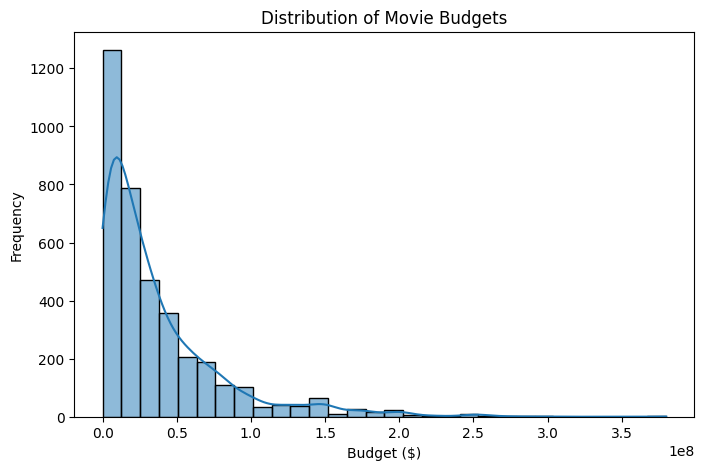

In [9]:
#budget distribution
plt.figure(figsize=(8, 5))
sns.histplot(df2['budget'].replace(0, np.nan).dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget ($)")
plt.ylabel("Frequency")
plt.show()

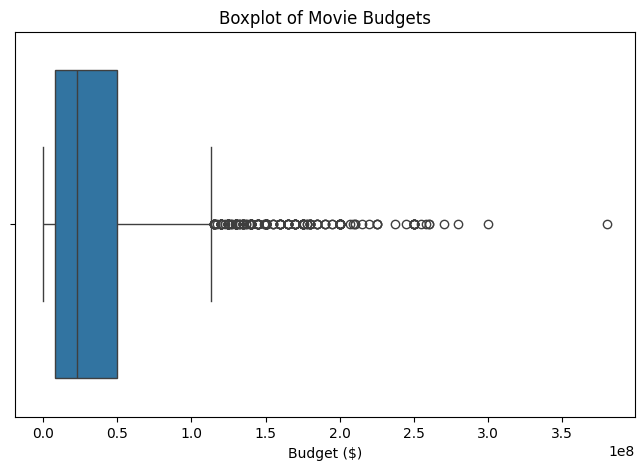

In [10]:
#boxplot for budget
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['budget'].replace(0, np.nan).dropna())
plt.title("Boxplot of Movie Budgets")
plt.xlabel("Budget ($)")
plt.show()

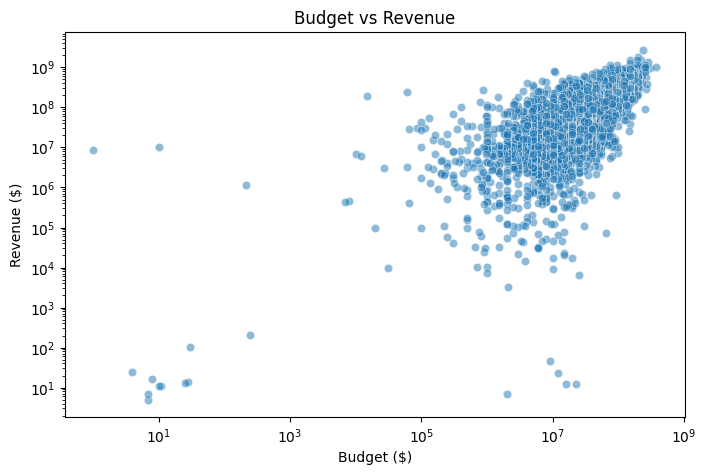

In [11]:
#budget vs revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2['budget'].replace(0, np.nan), y=df2['revenue'].replace(0, np.nan), alpha=0.5)
plt.title("Budget vs Revenue")
plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.show()

## Revenue


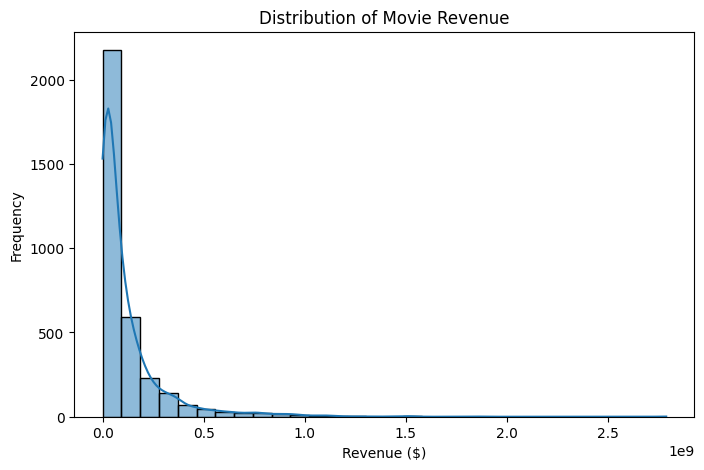

In [12]:
#revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(df2['revenue'].replace(0, np.nan).dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

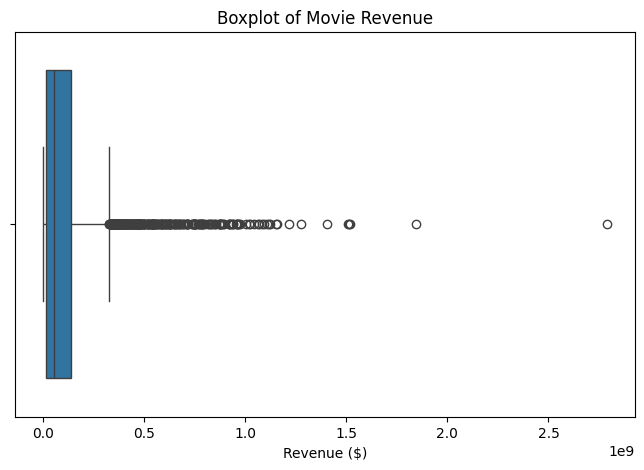

In [13]:
#boxplot for revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['revenue'].replace(0, np.nan).dropna())
plt.title("Boxplot of Movie Revenue")
plt.xlabel("Revenue ($)")
plt.show()

## Popularity

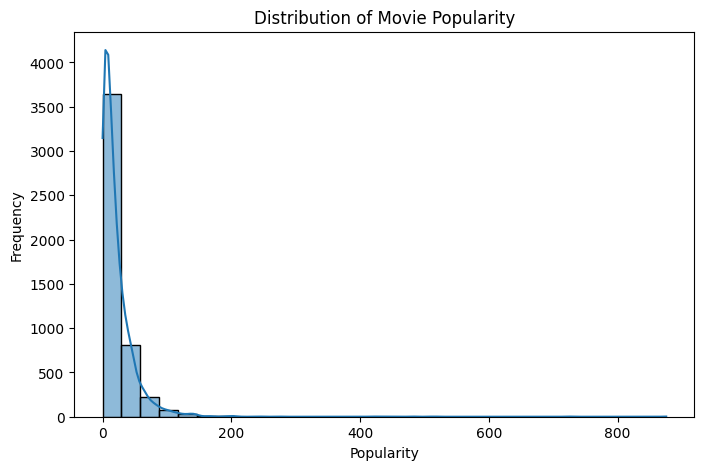

In [14]:
#popularity distribution
plt.figure(figsize=(8, 5))
sns.histplot(df2['popularity'].replace(0, np.nan).dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

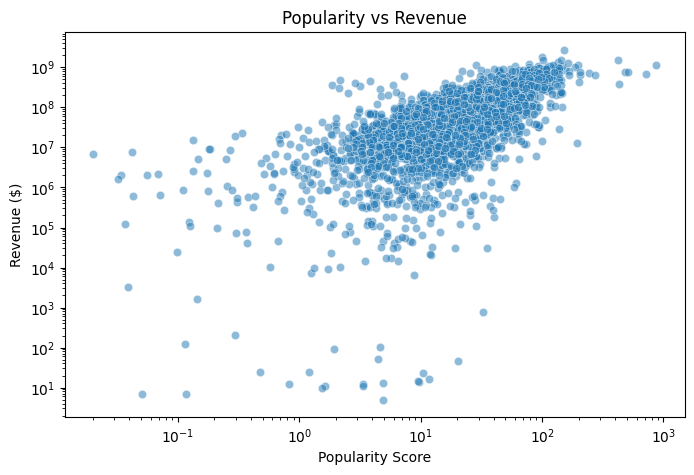

In [15]:
#popularity vs revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2['popularity'], y=df2['revenue'].replace(0, np.nan), alpha=0.5)
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity Score")
plt.ylabel("Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.show()


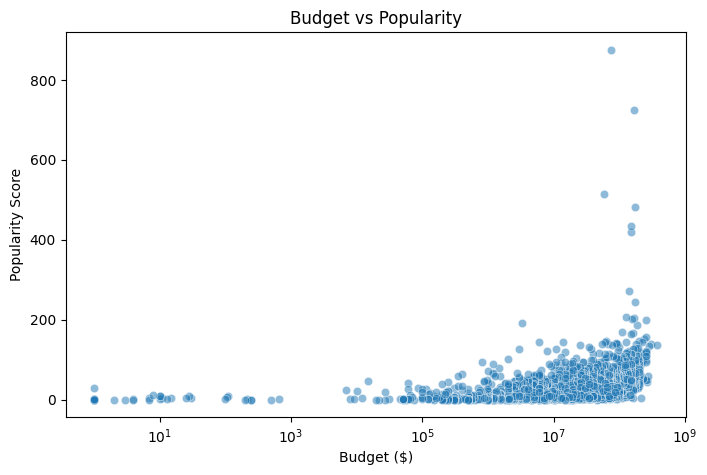

In [16]:
#popularity vs. budget
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2['budget'].replace(0, np.nan), y=df2['popularity'], alpha=0.5)
plt.title("Budget vs Popularity")
plt.xlabel("Budget ($)")
plt.ylabel("Popularity Score")
plt.xscale("log")  # Use log scale if budget is skewed
plt.show()


## Vote Average

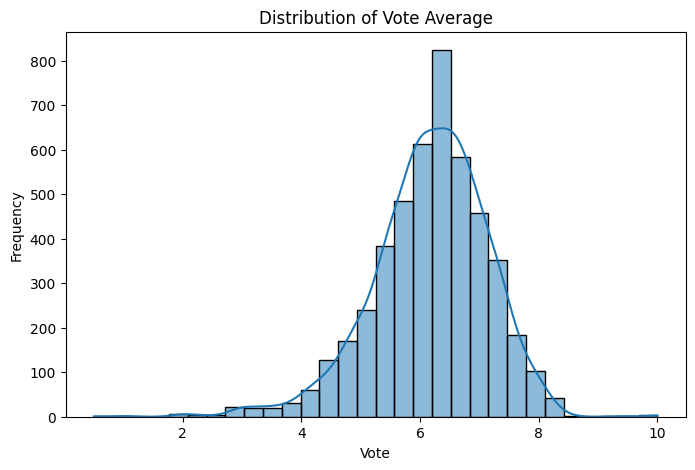

In [17]:
#vote_average distribution
plt.figure(figsize=(8, 5))
sns.histplot(df2['vote_average'].replace(0, np.nan).dropna(), bins=30, kde=True)
plt.title("Distribution of Vote Average")
plt.xlabel("Vote")
plt.ylabel("Frequency")
plt.show()

## Vote Count

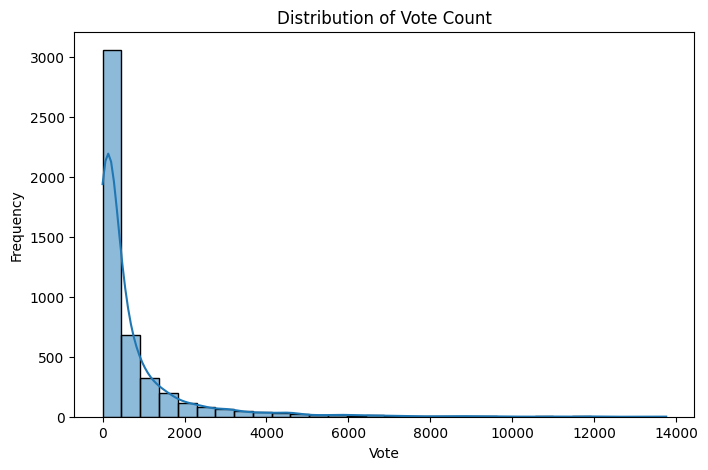

In [19]:
#vote_count distribution
plt.figure(figsize=(8, 5))
sns.histplot(df2['vote_count'].replace(0, np.nan).dropna(), bins=30, kde=True)
plt.title("Distribution of Vote Count")
plt.xlabel("Vote")
plt.ylabel("Frequency")
plt.show()

## Categorical Columns

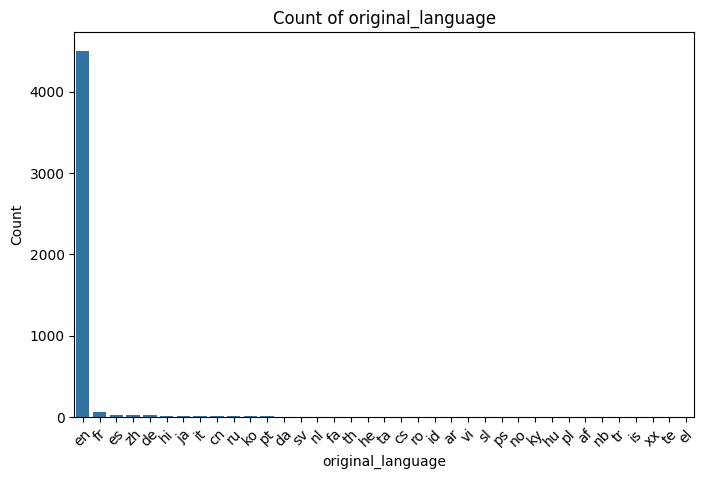

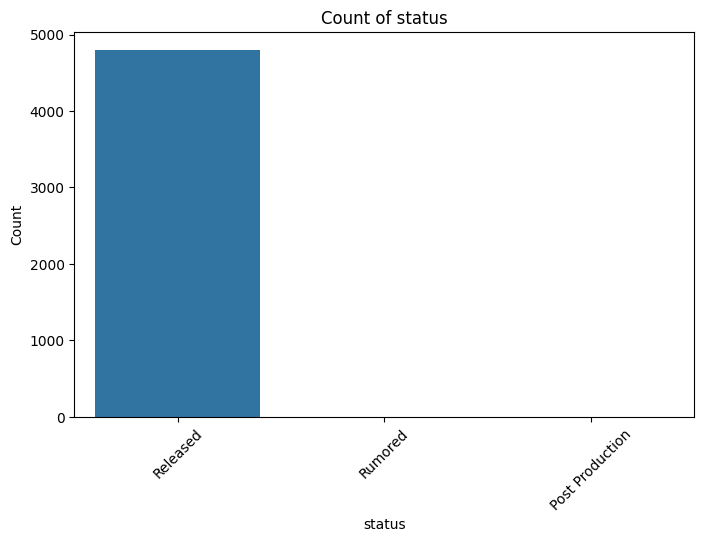

In [20]:
# Count plots for categorical columns
categorical_columns = ['original_language', 'status']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df2, x=col, order=df2[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Content-Based Filtering

In [22]:
df2.head(15)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"",

In [ ]:
#start with movie overview and movie title
movie_summary = df2['overview']
movie_title = df2['title']

In [34]:
# Map movie title to its index
movie_to_index = pd.Series(df2.index, index=df2['title']).drop_duplicates()
movie_to_index.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [ ]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
movie_matrix= tfidf.fit_transform(movie_summary)

#Output the shape of tfidf_matrix - we have 4803 rows and 20978 columns
movie_matrix.shape

(4803, 20978)

In [35]:
movie_to_index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
#simple recommender just based on the matrix - take Newlyweds for an example

Title = 'Newlyweds'

# Get the index of movie title
idx = movie_to_index[Title]

# Get the corresponding movie summary
movie_test_summary = [movie_summary[idx]]


In [ ]:
# Fetch the TF-IDF vector of the corresponding movie - Newlyweds
movie_test_matrix = tfidf.transform(movie_test_summary)
print(movie_test_matrix.shape)

(1, 20978)


In [ ]:
# Calculate the cosine similarity between the movie and each of the entry in  # movie_matrix

sim_scores = cosine_similarity(movie_test_matrix, movie_matrix).tolist()[0]
print(len(sim_scores)) #equal to the total number of movies in the movie matrix
# means that sim_scores variable contains the similarity between Newlyweds and each movie in the movie matrix

4803


In [40]:
#sort the similarity scores from the highest to lowest score and then fetch the 10 movies with the highest similarity score
sim_scores = sorted(enumerate(sim_scores), key=lambda i: i[1], reverse=True)


# Fetch the top 10 recommended movies
sim_scores = sim_scores[1:11]

In [44]:
# fetch the recommended movies’ indexes and then map the indexes back to their corresponding movie title

# Fetch the recommended movies' indexes
movie_indexes = [i[0] for i in sim_scores]

# Print the title of recommended movies
print([movie_title[i] for i in movie_indexes])

['Something Wicked', 'Ted 2', 'Our Family Wedding', 'Bride Wars', 'Just Married', 'The Secret Life of Pets', 'Bullet to the Head', 'Blue Ruin', 'The Second Best Exotic Marigold Hotel', 'Melancholia']


In [49]:
def get_recommendation(title, movie_matrix=movie_matrix):

  # Get the index of movie title
  idx = movie_to_index[title]

  # Get the corresponding movie summary
  movie_test_summary = [movie_summary[idx]]

  # Fetch the TF-IDF vector of the corresponding movie
  movie_test_matrix = tfidf.transform(movie_test_summary)

  # Calculate the cosine similarity between the movie and each of the entry in #   movie_matrix

  sim_scores = cosine_similarity(movie_test_matrix, movie_matrix).tolist()[0]
  sim_scores = sorted(enumerate(sim_scores), key=lambda i: i[1], reverse=True)

  # Fetch the top 10 recommended movies
  sim_scores = sim_scores[1:11]

  # Fetch the recommended movies' indexes
  movie_indexes = [i[0] for i in sim_scores]

  # Return the title of recommended movies
  return [movie_title[i] for i in movie_indexes]

In [53]:
title = 'Spider-Man 3'
get_recommendation(title)

['Spider-Man',
 'Spider-Man 2',
 'Arachnophobia',
 'The Amazing Spider-Man',
 'The Amazing Spider-Man 2',
 'The Thing',
 'Bronson',
 'Not Easily Broken',
 'Raising Victor Vargas',
 'Def-Con 4']